In [1]:
%cd ../
%matplotlib inline

/home/eli/AnacondaProjects/HTFATorch


In [2]:
import logging
import numpy as np
import htfa_torch.dtfa as DTFA
import htfa_torch.niidb as niidb
import htfa_torch.utils as utils

In [3]:
logging.basicConfig(format='%(asctime)s %(message)s', datefmt='%m/%d/%Y %H:%M:%S',
                    level=logging.INFO)

In [4]:
mini_pieman = niidb.FMriActivationsDb('data/mini_pieman.db',
                                     mask='data/pieman_data/wholebrain.nii.gz')

In [5]:
dtfa = DTFA.DeepTFA(mini_pieman.all(), mask='data/pieman_data/wholebrain.nii.gz', num_factors=100, embedding_dim=2)

06/04/2018 12:50:46 Loading Nifti image data/pieman_data/sub-001-task-intact1.nii with mask data/pieman_data/wholebrain.nii.gz (zscore=False)
06/04/2018 12:50:48 Loading Nifti image data/pieman_data/sub-003-task-intact1.nii with mask data/pieman_data/wholebrain.nii.gz (zscore=False)
06/04/2018 12:50:49 Loading Nifti image data/pieman_data/sub-002-task-intact1.nii with mask data/pieman_data/wholebrain.nii.gz (zscore=False)


In [6]:
dtfa.normalize_activations()

[10.872537612915039, 9.790372848510742, 8.538802146911621]

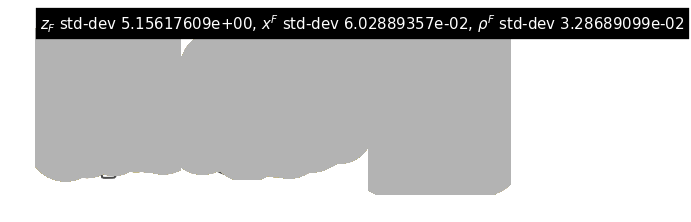

In [7]:
dtfa.visualize_factor_embedding()

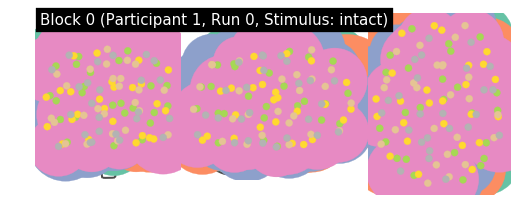

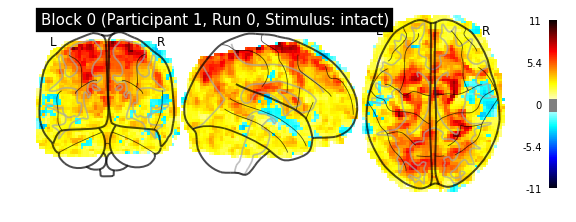

06/04/2018 12:53:04 Reconstruction Error (Frobenius Norm): 5.62811279e+03 out of 5.08479639e+03


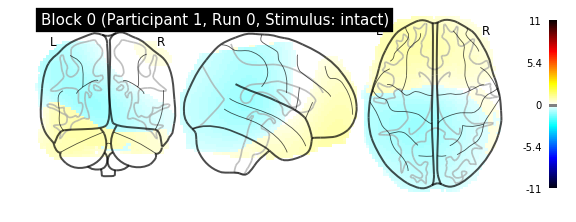

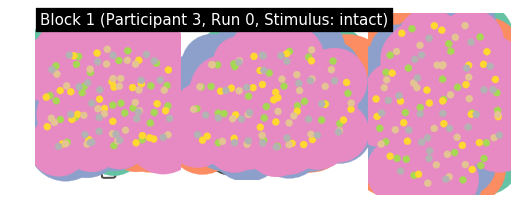

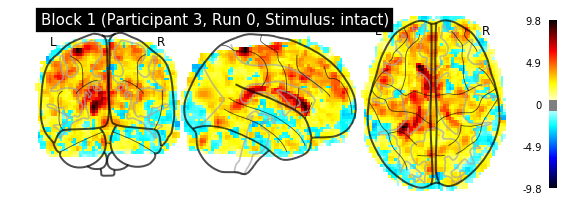

06/04/2018 12:53:31 Reconstruction Error (Frobenius Norm): 5.72818311e+03 out of 5.19534277e+03


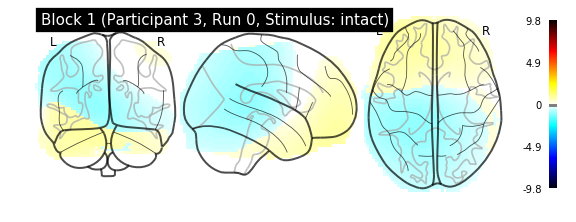

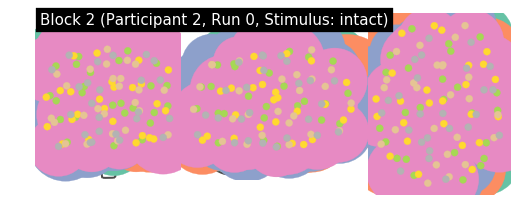

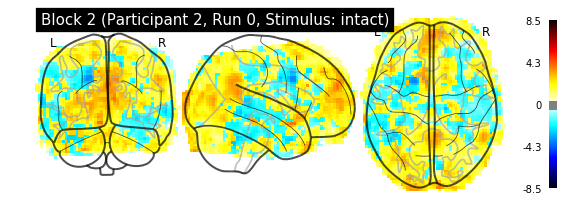

06/04/2018 12:53:59 Reconstruction Error (Frobenius Norm): 5.72818213e+03 out of 5.19534277e+03


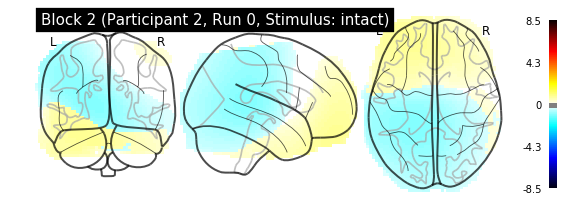

In [8]:
for b in range(dtfa.num_blocks):
    dtfa.plot_factor_centers(b)
    dtfa.plot_original_brain(b)
    dtfa.plot_reconstruction(b)

In [9]:
losses = dtfa.train(num_steps=500, learning_rate=1e-2, log_level=logging.INFO, num_particles=2,
                    batch_size=300, use_cuda=True, checkpoint_steps=10, blocks_batch_size=8, patience=20)

06/04/2018 12:54:00 [Epoch 1] (685ms) Posterior free-energy 3.94363986e+10
06/04/2018 12:54:00 Saving checkpoint...
06/04/2018 12:54:00 [Epoch 2] (565ms) Posterior free-energy 4.89196626e+10
06/04/2018 12:54:01 [Epoch 3] (537ms) Posterior free-energy 5.96806656e+10
06/04/2018 12:54:02 [Epoch 4] (540ms) Posterior free-energy 1.21628713e+10
06/04/2018 12:54:02 [Epoch 5] (548ms) Posterior free-energy 7.05493299e+09
06/04/2018 12:54:03 [Epoch 6] (531ms) Posterior free-energy 5.54432922e+09
06/04/2018 12:54:03 [Epoch 7] (554ms) Posterior free-energy 6.44911104e+09
06/04/2018 12:54:04 [Epoch 8] (553ms) Posterior free-energy 4.64239718e+09
06/04/2018 12:54:04 [Epoch 9] (550ms) Posterior free-energy 4.17447834e+09
06/04/2018 12:54:05 [Epoch 10] (547ms) Posterior free-energy 3.97986714e+09
06/04/2018 12:54:05 [Epoch 11] (550ms) Posterior free-energy 3.93121075e+09
06/04/2018 12:54:05 Saving checkpoint...
06/04/2018 12:54:06 [Epoch 12] (549ms) Posterior free-energy 3.91923149e+09
06/04/2018 12:5

Epoch    77: reducing learning rate of group 0 to 1.0000e-03.


06/04/2018 12:54:43 [Epoch 79] (555ms) Posterior free-energy 3.88153907e+09
06/04/2018 12:54:43 [Epoch 80] (546ms) Posterior free-energy 3.88131584e+09
06/04/2018 12:54:44 [Epoch 81] (531ms) Posterior free-energy 3.88229683e+09
06/04/2018 12:54:44 Saving checkpoint...
06/04/2018 12:54:44 [Epoch 82] (540ms) Posterior free-energy 3.88070707e+09
06/04/2018 12:54:45 [Epoch 83] (556ms) Posterior free-energy 3.88376474e+09
06/04/2018 12:54:45 [Epoch 84] (530ms) Posterior free-energy 3.88097485e+09
06/04/2018 12:54:46 [Epoch 85] (547ms) Posterior free-energy 3.88181504e+09
06/04/2018 12:54:46 [Epoch 86] (592ms) Posterior free-energy 3.88298803e+09
06/04/2018 12:54:47 [Epoch 87] (586ms) Posterior free-energy 3.88153805e+09
06/04/2018 12:54:47 [Epoch 88] (540ms) Posterior free-energy 3.88084070e+09
06/04/2018 12:54:48 [Epoch 89] (537ms) Posterior free-energy 3.88140288e+09
06/04/2018 12:54:49 [Epoch 90] (531ms) Posterior free-energy 3.88104704e+09
06/04/2018 12:54:49 [Epoch 91] (550ms) Posterio

Epoch    98: reducing learning rate of group 0 to 1.0000e-04.


06/04/2018 12:54:54 [Epoch 100] (572ms) Posterior free-energy 3.88129126e+09
06/04/2018 12:54:55 [Epoch 101] (530ms) Posterior free-energy 3.88225690e+09
06/04/2018 12:54:55 Saving checkpoint...
06/04/2018 12:54:55 [Epoch 102] (556ms) Posterior free-energy 3.88113715e+09
06/04/2018 12:54:56 [Epoch 103] (552ms) Posterior free-energy 3.88097280e+09
06/04/2018 12:54:56 [Epoch 104] (552ms) Posterior free-energy 3.88146534e+09
06/04/2018 12:54:57 [Epoch 105] (552ms) Posterior free-energy 3.88152064e+09
06/04/2018 12:54:57 [Epoch 106] (544ms) Posterior free-energy 3.88123750e+09
06/04/2018 12:54:58 [Epoch 107] (550ms) Posterior free-energy 3.88118656e+09
06/04/2018 12:54:59 [Epoch 108] (552ms) Posterior free-energy 3.88146995e+09
06/04/2018 12:54:59 [Epoch 109] (551ms) Posterior free-energy 3.88141722e+09
06/04/2018 12:55:00 [Epoch 110] (579ms) Posterior free-energy 3.88078694e+09
06/04/2018 12:55:00 [Epoch 111] (530ms) Posterior free-energy 3.88153139e+09
06/04/2018 12:55:00 Saving checkpoi

Epoch   119: reducing learning rate of group 0 to 5.0000e-05.


06/04/2018 12:55:06 [Epoch 121] (552ms) Posterior free-energy 3.88244582e+09
06/04/2018 12:55:06 Saving checkpoint...
06/04/2018 12:55:06 [Epoch 122] (592ms) Posterior free-energy 3.88056883e+09
06/04/2018 12:55:07 [Epoch 123] (584ms) Posterior free-energy 3.88152422e+09
06/04/2018 12:55:07 [Epoch 124] (530ms) Posterior free-energy 3.88112000e+09
06/04/2018 12:55:08 [Epoch 125] (529ms) Posterior free-energy 3.88649216e+09
06/04/2018 12:55:08 [Epoch 126] (537ms) Posterior free-energy 3.88106906e+09
06/04/2018 12:55:09 [Epoch 127] (549ms) Posterior free-energy 3.88113203e+09
06/04/2018 12:55:10 [Epoch 128] (546ms) Posterior free-energy 3.88813670e+09
06/04/2018 12:55:10 [Epoch 129] (536ms) Posterior free-energy 3.88108595e+09
06/04/2018 12:55:11 [Epoch 130] (584ms) Posterior free-energy 3.88278938e+09
06/04/2018 12:55:11 [Epoch 131] (585ms) Posterior free-energy 3.88151091e+09
06/04/2018 12:55:11 Saving checkpoint...
06/04/2018 12:55:12 [Epoch 132] (543ms) Posterior free-energy 3.8807828

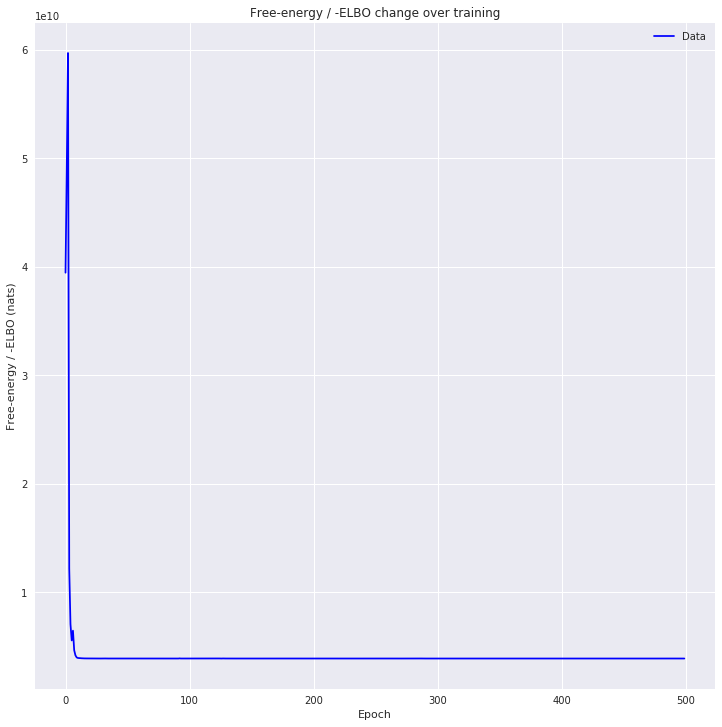

In [10]:
utils.plot_losses(losses)

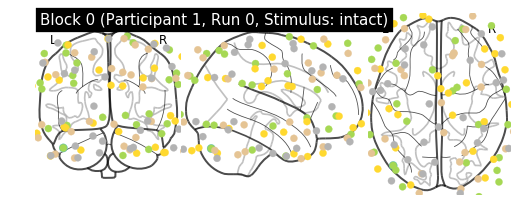

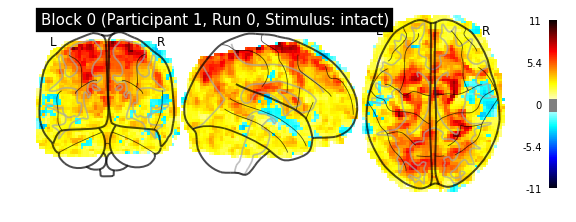

06/04/2018 12:58:58 Reconstruction Error (Frobenius Norm): 5.08485645e+03 out of 5.08479639e+03


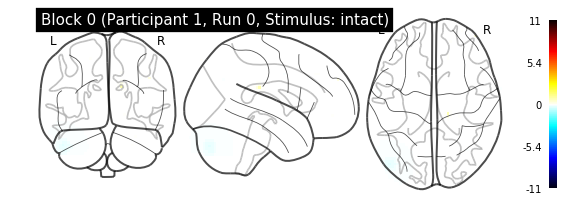

{'weights': 
-0.7840  0.9324 -0.5844  ...   0.3566 -1.2951 -0.9056
-0.7753  0.9676 -0.5774  ...   0.4274 -1.2974 -0.9018
-0.7897  1.0159 -0.5308  ...   0.4629 -1.3068 -0.8982
          ...             ⋱             ...          
-0.6913  1.0149 -0.5021  ...   0.4649 -1.2440 -0.8040
-0.6957  1.0302 -0.5183  ...   0.4116 -1.1939 -0.8222
-0.8023  0.9693 -0.5832  ...   0.4315 -1.3045 -0.9068
[torch.FloatTensor of size 300x100]
, 'factors': 
 0.0000  0.0000  0.0000  ...   0.0000  0.0000  0.0000
 0.0000  0.0000  0.0000  ...   0.0000  0.0000  0.0000
 0.0000  0.0000  0.0000  ...   0.0000  0.0000  0.0000
          ...             ⋱             ...          
 0.0000  0.0000  0.0000  ...   0.0000  0.0000  0.0000
 0.0000  0.0000  0.0000  ...   0.0000  0.0000  0.0000
 0.0000  0.0000  0.0000  ...   0.0000  0.0000  0.0000
[torch.FloatTensor of size 100x89972]
, 'factor_centers': 
 -67.3478  -66.9046   58.9500
  -5.9430   19.7815   -8.1374
 -43.4436  -15.9459  -16.7032
  29.6666  -77.9655  -15.8977
  

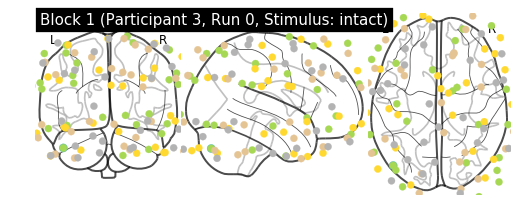

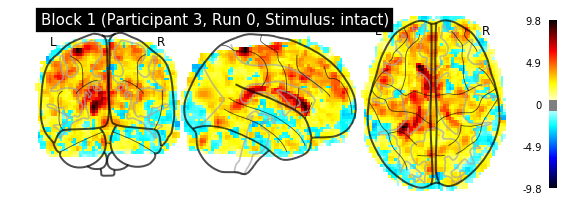

06/04/2018 12:59:25 Reconstruction Error (Frobenius Norm): 5.19542920e+03 out of 5.19534277e+03


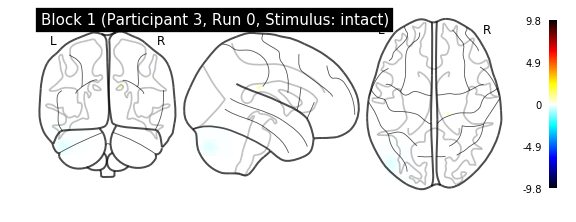

{'weights': 
-7.3685e-01  9.6104e-01 -5.7586e-01  ...   3.8383e-01 -1.2605e+00 -8.3360e-01
-8.0551e-01  1.0042e+00 -4.6557e-01  ...   4.9941e-01 -1.2651e+00 -8.5369e-01
-7.6645e-01  1.0163e+00 -4.5755e-01  ...   4.7705e-01 -1.2625e+00 -8.7382e-01
                ...                   ⋱                   ...                
-8.0944e-01  9.2303e-01 -5.2933e-01  ...   4.3913e-01 -1.3034e+00 -9.0157e-01
-7.9613e-01  9.2855e-01 -5.8421e-01  ...   3.6203e-01 -1.2738e+00 -8.8773e-01
-7.9974e-01  9.8701e-01 -5.2518e-01  ...   4.0514e-01 -1.2829e+00 -8.6759e-01
[torch.FloatTensor of size 300x100]
, 'factors': 
 0.0000  0.0000  0.0000  ...   0.0000  0.0000  0.0000
 0.0000  0.0000  0.0000  ...   0.0000  0.0000  0.0000
 0.0000  0.0000  0.0000  ...   0.0000  0.0000  0.0000
          ...             ⋱             ...          
 0.0000  0.0000  0.0000  ...   0.0000  0.0000  0.0000
 0.0000  0.0000  0.0000  ...   0.0000  0.0000  0.0000
 0.0000  0.0000  0.0000  ...   0.0000  0.0000  0.0000
[torch.FloatT

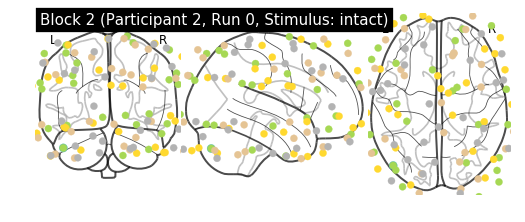

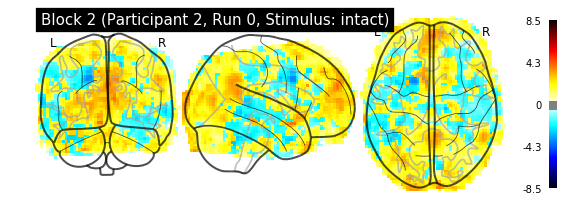

06/04/2018 12:59:54 Reconstruction Error (Frobenius Norm): 5.19539111e+03 out of 5.19534277e+03


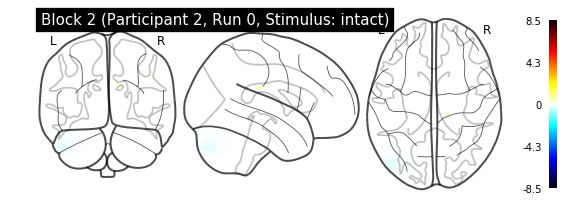

{'weights': 
-6.7078e-01  9.9527e-01 -5.5445e-01  ...   4.4362e-01 -1.2137e+00 -7.8158e-01
-6.4914e-01  9.6014e-01 -5.8011e-01  ...   4.3897e-01 -1.1807e+00 -8.3927e-01
-6.7563e-01  9.2239e-01 -5.8248e-01  ...   3.5592e-01 -1.2751e+00 -9.0034e-01
                ...                   ⋱                   ...                
-6.5318e-01  9.8079e-01 -4.7905e-01  ...   4.8886e-01 -1.1827e+00 -7.6403e-01
-6.4922e-01  9.8045e-01 -4.9871e-01  ...   4.6598e-01 -1.1831e+00 -7.9342e-01
-6.4615e-01  1.0137e+00 -4.5399e-01  ...   4.6166e-01 -1.1681e+00 -7.5467e-01
[torch.FloatTensor of size 300x100]
, 'factors': 
 0.0000  0.0000  0.0000  ...   0.0000  0.0000  0.0000
 0.0000  0.0000  0.0000  ...   0.0000  0.0000  0.0000
 0.0000  0.0000  0.0000  ...   0.0000  0.0000  0.0000
          ...             ⋱             ...          
 0.0000  0.0000  0.0000  ...   0.0000  0.0000  0.0000
 0.0000  0.0000  0.0000  ...   0.0000  0.0000  0.0000
 0.0000  0.0000  0.0000  ...   0.0000  0.0000  0.0000
[torch.FloatT

In [11]:
for b in range(dtfa.num_blocks):
    dtfa.plot_factor_centers(b)
    dtfa.plot_original_brain(b)
    dtfa.plot_reconstruction(b)
    print(dtfa.results(b))

In [12]:
def task_rest_labeler(block):
    if 'rest' in block.task:
        return 'Rest'
    else:
        return 'Task'

/home/eli/anaconda3/envs/HTFATorch/lib/python3.6/site-packages/matplotlib/figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


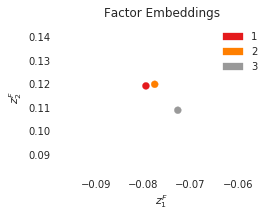

In [13]:
dtfa.scatter_factor_embedding(labeler=lambda block: block.subject)

/home/eli/anaconda3/envs/HTFATorch/lib/python3.6/site-packages/matplotlib/figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


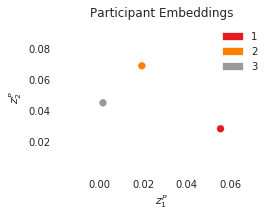

In [14]:
dtfa.scatter_subject_embedding(labeler=lambda block: block.subject)

/home/eli/anaconda3/envs/HTFATorch/lib/python3.6/site-packages/matplotlib/figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


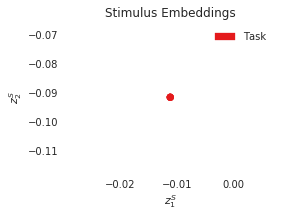

In [15]:
dtfa.scatter_task_embedding(labeler=task_rest_labeler)

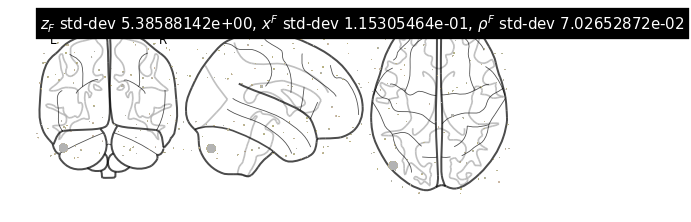

In [16]:
dtfa.visualize_factor_embedding()